#Predicting the Class of Patients from Biomechanical Measurements

##Introduction


###About
This dataset was found on Kaggle at https://www.kaggle.com/datasets/nreshma/vertebral-column-dataset. Only the dataset itself plus a few labels were uploaded; and I also had to do some digging to find detailed explainations of the the biomechanical measurements, which I've summarized below. I would like to preface that I am not a physician. This notebook explores the dataset, just for fun and to flex my skills in statisics and machine learning. It is not genuine medical research.

After the background review of existing literature, there will be exploratory analytics done on the dataset to inform what kind of machine learning model that will be used later. It will also provide insight into how each measurement influences the patient's classification and detail relationships between the measurements.

This analysis culminates in creating machine learning algorithms that predict a patient's spine health classification based on their biomechanical measurements.

###Biomechanical Measurements

**Pelvic Tilt** is the angle between a vertical line, and the line between the center of the femoral head and the center of the sacral plateau of the S1 vertebrae. It describes the forward or backward orientation of the pelvis (Le Huec, 2011).


**Sacral Slope** is the angle of the sacral plateau of the S1 vertebrae to a horizontal line. It determines the position of the lumbar spine (Le Huec, 2011).

**Pelvic Incidence** is the sum of pelvic tilt and sacral slope angles. This number is fixed for a given patent (though it is different for each patient), giving sacral slope and pelvic tilt an inverse relationship. Pelvic incidence determines the relative position of the sacral plate in relation to the femoral heads (Le Huec, 2011).

**Lumbar Lordosis Angle** is the of curvature of the lumbar spine that generally absorbs compressive forces on the spine. It is the angle created by lines extending from the L1 and L5 vertebrae. (Dimitrijević, 2022)

**Pelvic Radius** is the measurement taken from a line drawn between the hip axis and the posterior corner of S1 (Le Huec, 2011).


**Degree Spondylolisthesis** measures how much a vertebrae has slipped onto an adjacent vertebrae, with respect to that adjacent vertebrae. (Gillis, 2023)

###Classifications
**Class** describes each subjects' spine as one of; **Normal (NO)** or **Abnormal (AB)**. **Abnormal** spines have the sub-classification of **Disk Hernia (DH)** or **Spondylolisthesis (SL)**

**NO** denotes a subject whose biomechanical measurements do not indicate either a disk hernia nor spondylolisthesis. It's important to mention these are the only two conditions considered in this dataset.

**AB** denotes a subject whose biomechanical measurements indicate either a disk hernia or spondylolisthesis.

**DH**

**SL**

In [ ]:
#Unzip dataset files
#importing required modules
from zipfile import ZipFile

#specifying the zip file name
file_name = "/content/drive/MyDrive/Data Projects/Vertebral Abnormalities/vertebralColumn.zip"

#opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    #printing all the contents of the zip file
    zip.printdir()

    #extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
column_2C.dat                                  2023-06-23 04:08:10        11796
column_2C_weka.arff                            2023-06-23 04:08:10        25142
column_3C.dat                                  2023-06-23 04:08:10        11796
column_3C_weka.arff                            2023-06-23 04:08:10        26389
Extracting all the files now...
Done!


##Getting Started

In [ ]:
#imports
import pandas as pd
from scipy.io import arff

In [ ]:
#pull the data from the normal/abnormal.arff file into a pandas dataframe
f = "column_2C_weka.arff"
data = arff.loadarff(f)
df = pd.DataFrame(data[0])
df.tail()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,b'Normal'


In [ ]:
#check for null and NA values
df.isnull()
df.isna()
#the dataset does not have any null or NA values,
#which is what I'd expect from patient data.
#If a patient were unable to provide a measurement
#they'd be outside of the scope of what I'm interested in.

In [ ]:
#for a reason I can't figure out, the class column is in bytes and not strings
#this code converts them to strings
df['class'] = df['class'].str.decode("utf-8")
df.head()

In [ ]:
#this code will do all of the above for the abnormal/subclasses.arff file
f_abnormal = "column_3C_weka.arff"
data_abnormal = arff.loadarff(f_abnormal)
df_abnormal = pd.DataFrame(data_abnormal[0])
df_abnormal['class'] = df_abnormal['class'].str.decode("utf-8")
df_abnormal.isnull()
df_abnormal.isna()

##Exploratory Analysis

###Measurements

In [ ]:
df["class"].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [ ]:
#mean, median, and range of measurements for all spine classes
#mean
total_mean = df.mean()
print(f"\nThe mean value for each measurement is\n{total_mean}")

#median
total_median = df.median()
print(f"\nThe median value for each measurement is\n{total_median}")

#range
total_min = df.min(numeric_only=True)
total_max = df.max(numeric_only=True)
total_range = pd.concat([total_min, total_max], axis=1, keys=["min","max"])
print(f"\nThe range for each measurement is\n{total_range}")



The mean value for each measurement is
pelvic_incidence             60.496653
pelvic_tilt                  17.542822
lumbar_lordosis_angle        51.930930
sacral_slope                 42.953831
pelvic_radius               117.920655
degree_spondylolisthesis     26.296694
dtype: float64

The median value for each measurement is
pelvic_incidence             58.691038
pelvic_tilt                  16.357689
lumbar_lordosis_angle        49.562398
sacral_slope                 42.404912
pelvic_radius               118.268178
degree_spondylolisthesis     11.767934
dtype: float64

The range for each measurement is
                                min         max
pelvic_incidence          26.147921  129.834041
pelvic_tilt               -6.554948   49.431864
lumbar_lordosis_angle     14.000000  125.742385
sacral_slope              13.366931  121.429566
pelvic_radius             70.082575  163.071041
degree_spondylolisthesis -11.058179  418.543082


<ipython-input-8-68f8cc74c180>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_mean = df.mean()
<ipython-input-8-68f8cc74c180>:7: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  total_median = df.median()


In [ ]:
#mean, median, and range of normal measurements
df_normal = df.loc[df['class'] == 'Normal']

#mean
normal_mean = df_normal.mean()
print(f"\nThe mean value for each normal measurement is\n{normal_mean}")

#median
normal_median = df_normal.median()
print(f"\nThe median value for each normal measurement is\n{normal_median}")

#range
normal_min = df_normal.min(numeric_only=True)
normal_max = df_normal.max(numeric_only=True)
normal_range = pd.concat([normal_min, normal_max], axis=1, keys=["min","max"])
print(f"\nThe range for each normal measurement is\n{normal_range}")



The mean value for each normal measurement is
pelvic_incidence             51.685244
pelvic_tilt                  12.821414
lumbar_lordosis_angle        43.542605
sacral_slope                 38.863830
pelvic_radius               123.890834
degree_spondylolisthesis      2.186572
dtype: float64

The median value for each normal measurement is
pelvic_incidence             50.123115
pelvic_tilt                  13.482435
lumbar_lordosis_angle        42.638923
sacral_slope                 37.059694
pelvic_radius               123.874328
degree_spondylolisthesis      1.152710
dtype: float64

The range for each normal measurement is
                                 min         max
pelvic_incidence           30.741938   89.834676
pelvic_tilt                -5.845994   29.894119
lumbar_lordosis_angle      19.071075   90.563461
sacral_slope               17.386972   67.195460
pelvic_radius             100.501192  147.894637
degree_spondylolisthesis  -11.058179   31.172767


<ipython-input-9-f1c0bcd90695>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normal_mean = df_normal.mean()
<ipython-input-9-f1c0bcd90695>:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  normal_median = df_normal.median()


In [ ]:
#mean, median, and range of abnormal measurements
df_abnormal = df.loc[df['class'] == 'Abnormal']

#mean
abnormal_mean = df_abnormal.mean()
print(f"\nThe mean value for each abnormal measurement is\n{abnormal_mean}")

#median
abnormal_median = df_abnormal.median()
print(f"\nThe median value for each abnormal measurement is\n{abnormal_median}")

#range
abnormal_min = df_abnormal.min(numeric_only=True)
abnormal_max = df_abnormal.max(numeric_only=True)
abnormal_range = pd.concat([abnormal_min, abnormal_max], axis=1, keys=["min","max"])
print(f"\nThe range for each abnormal measurement is\n{abnormal_range}")



The mean value for each abnormal measurement is
pelvic_incidence             64.692562
pelvic_tilt                  19.791111
lumbar_lordosis_angle        55.925370
sacral_slope                 44.901450
pelvic_radius               115.077713
degree_spondylolisthesis     37.777705
dtype: float64

The median value for each abnormal measurement is
pelvic_incidence             65.274888
pelvic_tilt                  18.798899
lumbar_lordosis_angle        56.150000
sacral_slope                 44.639597
pelvic_radius               115.650323
degree_spondylolisthesis     31.946516
dtype: float64

The range for each abnormal measurement is
                                min         max
pelvic_incidence          26.147921  129.834041
pelvic_tilt               -6.554948   49.431864
lumbar_lordosis_angle     14.000000  125.742385
sacral_slope              13.366931  121.429566
pelvic_radius             70.082575  163.071041
degree_spondylolisthesis -10.675871  418.543082


<ipython-input-11-5bfd329aedc4>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  abnormal_mean = df_abnormal.mean()
<ipython-input-11-5bfd329aedc4>:9: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  abnormal_median = df_abnormal.median()


Here are the major things to take away from the above calculations. For pelvic radius, both the mean and median

In [ ]:
df_abnormal["class"].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [ ]:
#mean, median, and range of hernia measurements
df_hernia = df_abnormal.loc[df_abnormal['class'] == 'Hernia']

#mean
hernia_mean = df_hernia.mean()
print(f"\nThe mean value for each hernia measurement is\n{hernia_mean}")

#median
hernia_median = df_hernia.median()
print(f"\nThe median value for each hernia measurement is\n{hernia_median}")

#range
hernia_min = df_hernia.min(numeric_only=True)
hernia_max = df_hernia.max(numeric_only=True)
hernia_range = pd.concat([hernia_min, hernia_max], axis=1, keys=["min","max"])
print(f"\nThe range for each hernia measurement is\n{hernia_range}")

In [ ]:
#mean, median, and range of spondylolisthesis measurements
df_spondy = df_abnormal.loc[df_abnormal['class'] == 'Spondylolisthesis']

#mean
spondy_mean = df_spondy.mean()
print(f"\nThe mean value for each spondylolisthesis measurement is\n{spondy_mean}")

#median
spondy_median = df_spondy.median()
print(f"\nThe median value for each spondylolisthesis measurement is\n{spondy_median}")

#range
spondy_min = df_spondy.min(numeric_only=True)
spondy_max = df_spondy.max(numeric_only=True)
spondy_range = pd.concat([spondy_min, spondy_max], axis=1, keys=["min","max"])
print(f"\nThe range for each spondylolisthesis measurement is\n{spondy_range}")

Observations on the above calculations will go here

###Relationships

In [ ]:
#imports for data visualization
import seaborn as sns
sns.set_theme()

In [ ]:
#here we'll compare normal and abnormal spines
sns.relplot(
    data = df,
    x="pelvic_incidence", y="pelvic_radius",
    hue="class",
    col="class",
)

In [ ]:
sns.relplot(
    data = df,
    x="sacral_slope", y="degree_spondylolisthesis",
    hue="class"
)

Observations on normal vs abnormal spines go here

In [ ]:
#here we'll look at the differences between disk herneas, and spondylolisthesis
sns.relplot(
    data = df_abnormal[df_abnormal["class"] != "Normal"],
     x="pelvic_incidence", y="degree_spondylolisthesis",
    hue="class",
)

Observations on disk herneas and spondylolisthesis go here

In [ ]:
#here we'll compare normal spines to each of the abnormal sub-classifications



Observations on normal compared to disk herneas and spondylolisthesis go here

##Models

The data has already been labled, and each patient given a classification, so supervised models will work best here. To start, with the K-Nearest Neighbor model the optimization will be done for each hyperparamater with some visualizations to show the process. For the artificial neural network and Gradiant Boost model, I'll use sklearn's model_selection.GridSearchCV function that does all of the optimization for us.

In [ ]:
#this cell contains all imports for training and testing the models
import numpy
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, make_scorer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#before we get into building any of the models,
#heres some code to easily use k-fold validation data
def model_optimization(model_scores):
  #k-fold accuracy
  kfold_accuracy = model_scores["test_accuracy"].mean()
  accuracy.append(kfold_accuracy)
  #k-fold accuracy standard deviation
  kfold_acc_sd = numpy.std(model_scores["test_accuracy"])
  acc_sd.append(kfold_acc_sd)

  #k-fold precision
  kfold_precision = model_scores["test_precision"].mean()
  precision.append(kfold_precision)
  #k-fold precision standard deviation
  kfold_pre_sd = numpy.std(model_scores["test_precision"])
  pre_sd.append(kfold_pre_sd)

In [ ]:
#puts test results into a dataframe for easy graphing
def prep_df(index):
  results_df = pd.DataFrame(index=index, columns=["Accuracy_Score","Acc_Std_Dev", "Precision_Score","Pre_Std_Dev"])
  results_df["Accuracy_Score"] = accuracy
  results_df["Acc_Std_Dev"] = acc_sd
  results_df["Precision_Score"] = precision
  results_df["Pre_Std_Dev"] = pre_sd
  return(results_df)

###K-Nearest Neighbor

####Setting Up

In [ ]:
#here we'll structure the data for the knn model,
#and split into training and test sets

#knn model only accepts numerical data, so we'll give each outcome a number
#normal = 0, and abnormal = 1
knn_data = df.replace({"Normal": 0, "Abnormal": 1})
knn_features = df.drop("class", axis=1)
knn_targets = knn_data["class"] #lists targets

knn_X_train, knn_X_test, knn_Y_train, knn_Y_test = train_test_split(
    knn_features, knn_targets, test_size=0.2, random_state=50, shuffle=True
)
#knn_X_train.head()
#knn_Y_test.head()

####Optimizing Paramaters

To optimize the k-nearest-neightbor model, we'll look at 2 of its hyperparamaters; the value of K, and how the model weighs its data



In [ ]:
#defines hyperparamater options
k_range = range(1,20)
#set up data structures to hold results
accuracy = []
acc_sd = []
precision = []
pre_sd = []

#optimizes number of neighbors
for i in k_range:
  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_scores = cross_validate(knn_model, knn_X_train, knn_Y_train, cv=5, scoring=["accuracy", "precision"])
  model_optimization(knn_scores)

#put test results into a dataframe for easy graphing
results_df = prep_df(k_range)

In [ ]:
#visualizes the k neighbor optimization accuracy
k_acc_graph = sns.lineplot(x = results_df.index, y = results_df["Accuracy_Score"])
k_acc_graph.set(title = "Optimizing the Value of K", xlabel = "Value of K")
k_acc_graph.set_ylim(0.7, 1.0)
k_acc_graph.set_xlim(0,20)
plt.errorbar(
    x = results_df.index,
    y = results_df["Accuracy_Score"],
    yerr=results_df["Acc_Std_Dev"],
    ecolor = "blue",
    elinewidth = 15,
    fmt = "none",
    alpha = 0.25
)
plt.show()

In [ ]:
#visualizes the k neighbor optimization precision
k_pre_graph = sns.lineplot(x = results_df.index, y = results_df["Precision_Score"])
k_pre_graph.set(title = "Optimizing the Value of K", xlabel = "Value of K")
plt.errorbar(
    x = results_df.index,
    y = results_df["Precision_Score"],
    yerr=results_df["Pre_Std_Dev"],
    ecolor = "orange",
    elinewidth = 15,
    fmt = "none",
    alpha = 0.25
)
plt.show()

It looks like the highest accuracy with the lowest value of K is 8, at about 87%, with 95% precision, so we will use that.

K-Nearest-Neighbor Model Weights Optimization

In [ ]:
#optimizes the knn model weights type
#optimization tests to be graphed
knn_weights = ["uniform", "distance"]
accuracy = []
acc_sd = []
precision = []
pre_sd = []

for i in knn_weights:
  knn_model = KNeighborsClassifier(
      n_neighbors = 8,
      weights = i
    )
  #k-fold weight validation
  model_scores = cross_validate(knn_model, knn_X_train, knn_Y_train, cv=5, scoring=["accuracy", "precision"])
  model_optimization(model_scores)

#put test results into a dataframe for easy graphing
results_df = prep_df(knn_weights)

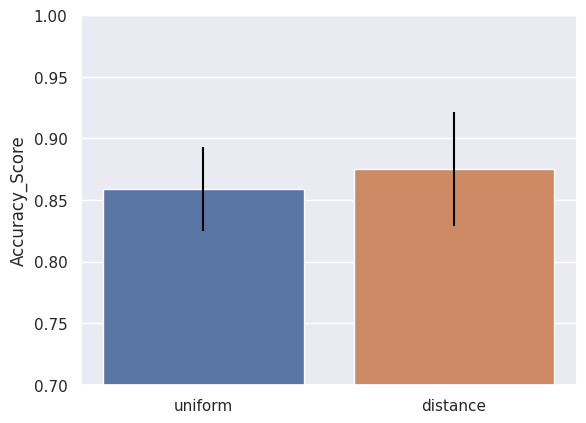

In [ ]:
#graph accuracy
knn_graph = sns.barplot(x = results_df.index,y = results_df["Accuracy_Score"])
knn_graph.set_ylim(0.7,1.0)
plt.errorbar(
    x = results_df.index,
    y = results_df["Accuracy_Score"],
    yerr=results_df["Acc_Std_Dev"],
    ecolor = "black",
    fmt = "none"
)
plt.show()

####Final KNN Model

In [ ]:
#final knn model
knn_model = KNeighborsClassifier(
    n_neighbors = 8,
    weights = "distance"
)
knn_model.fit(knn_X_train, knn_Y_train)

#displays the final KNN model
knn_Y_predict = knn_model.predict(knn_X_test)
knn_accuracy = accuracy_score(knn_Y_test, knn_Y_predict)
knn_precision = precision_score(knn_Y_test, knn_Y_predict)
print("Accuracy:", knn_accuracy, "Precision: ", knn_precision)

Accuracy: 0.8548387096774194 Precision:  0.926829268292683


Thoughts on the KNN model go here

###Artifical Neural Network

####Setting Up

For training an artifical neural network, I'd like to try and use the dataset that categorizes abnormal spines as either disk hernia or spondylolisthesis.

In [ ]:
#here we'll structure the data for the ann model,
#and split into training and test sets

#ann model only accepts numerical data, so we'll give each outcome a number
#normal = 0, spondylolisthesis = 1, hernia = 2
ann_data = df_abnormal.replace({"Normal": 0, "Spondylolisthesis": 1, "Hernia": 2})
ann_features = df_abnormal.drop("class", axis=1)
ann_targets = ann_data["class"] #lists targets

ann_X_train, ann_X_test, ann_Y_train, ann_Y_test = train_test_split(
    ann_features, ann_targets, test_size=0.2, random_state=30, shuffle=True
)
#ann_X_train.head()
#ann_Y_test.head()

####Optimizing Paramaters

In [ ]:
#grid search cross validation optimizing ANN model
#I went through each param seperately to try to narrow it down first
paramaters = {
    #"solver": ['lbfgs', 'sgd', 'adam'],
    "activation": ['identity', 'logistic', 'tanh', 'relu'],
    "hidden_layer_sizes": range(20,30),
    "max_iter":[100000]
} #hyperparamaters to be optimized
ann_model = MLPClassifier() #defines model

#optimization
grid_search = GridSearchCV(ann_model, paramaters, scoring="accuracy")
grid_search.fit(ann_X_train, ann_Y_train)
grid_search.best_params_

{'activation': 'identity', 'hidden_layer_sizes': 21, 'max_iter': 100000}

The highest accuracy(0.83) and precision (0.795) were reached with a hidden layer size of 22.

####Final ANN Model

In [ ]:
#this is the final ANN model, with some tests evaluating it
ann_model = MLPClassifier(
    random_state=30,
    max_iter=2000,
    hidden_layer_sizes=(21,),
    activation='identity',
    solver='lbfgs'
)
ann_model.fit(ann_X_train, ann_Y_train)

#displays the final KNN model
ann_Y_predict = ann_model.predict(ann_X_test)
ann_accuracy = accuracy_score(ann_Y_test, ann_Y_predict)
ann_precision = precision_score(ann_Y_test, ann_Y_predict, average=None)
print("Accuracy:", ann_accuracy, "Precision: ", ann_precision.mean())

Accuracy: 0.8548387096774194 Precision:  0.7905525846702317


With the artifical neural network, the accuracy also got to 85%, but the precision only got up to 79% after the optimization. I believe the precision being significantly lower than with the K-nearest neighbor model is because of the very small dataset, and the differences in how each patient was categorized.

##Conclusions

These models have been a great example of how challenging it is to accurately impliment machine learning to diagnose patients. The K-nearest-neighbor model only achieved 85% accuracy.

Barriers to pushing the accuracy of these models higher include: inconsistencies in how patients are diagnosed, the overall health of patients in the training data, and human health being so complicated that biomechanical measurements don't tell the whole story.

While disk hernias and spondylolisthesis are among the more common orthopedic spinal abnormalities, they are not the only ones. A subject considered to have "normal" spine health in this study, may not have a healthy spine. With the dataset being small, only about 300 subjects, this is a fine concession to make to train a model to recognize disk hernias and spondylolisthesis.

##Citations
Le Huec, J. C., Aunoble, S., Philippe, L., & Nicolas, P. (2011). Pelvic parameters: origin and significance. European spine journal : official publication of the European Spine Society, the European Spinal Deformity Society, and the European Section of the Cervical Spine Research Society, 20 Suppl 5(Suppl 5), 564–571. https://doi.org/10.1007/s00586-011-1940-1

Dimitrijević, V., Šćepanović, T., Milankov, V., Milankov, M., & Drid, P. (2022). Effects of Corrective Exercises on Lumbar Lordotic Angle Correction: A Systematic Review and Meta-Analysis. International journal of environmental research and public health, 19(8), 4906. https://doi.org/10.3390/ijerph19084906

Tenny S, Gillis CC. Spondylolisthesis. [Updated 2023 May 22]. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2023 Jan-. Available from: https://www.ncbi.nlm.nih.gov/books/NBK430767/

Dataset: https://www.kaggle.com/datasets/nreshma/vertebral-column-dataset